<a href="https://colab.research.google.com/github/PorasS/AI/blob/master/RegressionNNRMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# Read the data set
df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv", na_values=['NA','?'])

display(df[0:5])

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c
2,3,pe,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b
3,4,11,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b
4,5,kl,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a


In [2]:
# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix='job')],axis=1)
df.drop('job',axis=1,inplace=True)
display(df[0:5])

,id,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product,job_11,job_al,job_am,job_ax,job_bf,job_by,job_cv,job_de,job_dz,job_e2,job_f8,job_gj,job_gv,job_kd,job_ke,job_kl,job_kp,job_ks,job_kw,job_mm,job_nb,job_nn,job_ob,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz
0,1,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,4,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix='area')],axis=1)
df.drop('area',axis=1,inplace=True)
display(df[0:5])

,id,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product,job_11,job_al,job_am,job_ax,job_bf,job_by,job_cv,job_de,job_dz,job_e2,job_f8,job_gj,job_gv,job_kd,job_ke,job_kl,job_kp,job_ks,job_kw,job_mm,job_nb,job_nn,job_ob,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz,area_a,area_b,area_c,area_d
0,1,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix='product')],axis=1)
df.drop('product',axis=1,inplace=True)
display(df[0:5])

,id,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,job_11,job_al,job_am,job_ax,job_bf,job_by,job_cv,job_de,job_dz,job_e2,job_f8,job_gj,job_gv,job_kd,job_ke,job_kl,job_kp,job_ks,job_kw,job_mm,job_nb,job_nn,job_ob,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz,area_a,area_b,area_c,area_d,product_a,product_b,product_c,product_d,product_e,product_f,product_g
0,1,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
1,2,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,3,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,4,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,5,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [10]:
# fill missing values
print(df['income'].isnull().values.any())
med = df['income'].median()
df['income'] = df['income'].fillna(med)

True


In [11]:
# Standardize Ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['subscriptions'] =zscore(df['subscriptions'])
df['save_rate'] = zscore(df['save_rate'])

display(df[0:5])

,id,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,job_11,job_al,job_am,job_ax,job_bf,job_by,job_cv,job_de,job_dz,job_e2,job_f8,job_gj,job_gv,job_kd,job_ke,job_kl,job_kp,job_ks,job_kw,job_mm,job_nb,job_nn,job_ob,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz,area_a,area_b,area_c,area_d,product_a,product_b,product_c,product_d,product_e,product_f,product_g
0,1,-0.607550,-0.664918,-0.208449,9.017895,-0.215764,11.738935,49,0.885827,0.492126,0.071100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
1,2,0.338053,-0.207748,0.839031,7.766643,0.196869,6.805396,51,0.874016,0.342520,0.400809,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,3,-0.184205,1.127906,-0.208449,3.632069,-0.714362,13.671772,44,0.944882,0.724409,0.207723,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,4,-0.526467,-0.440815,-0.208449,5.372942,-0.542432,4.333286,50,0.889764,0.444882,0.361216,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,5,-2.851675,1.638861,1.886511,3.822477,-0.473660,5.967121,38,0.744094,0.661417,0.068033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [13]:
# Convert to numpy - regression
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values

# Create train/test
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# create neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # hidden 1
model.add(Dense(10, activation='relu')) #hidden 2
model.add(Dense(1)) # output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3,patience=5,verbose=1, mode='auto',restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
47/47 - 0s - loss: 1472.5552 - val_loss: 1040.5665
Epoch 2/1000
47/47 - 0s - loss: 625.0792 - val_loss: 306.3122
Epoch 3/1000
47/47 - 0s - loss: 264.4017 - val_loss: 240.9818
Epoch 4/1000
47/47 - 0s - loss: 228.4306 - val_loss: 211.3404
Epoch 5/1000
47/47 - 0s - loss: 197.8152 - val_loss: 183.2706
Epoch 6/1000
47/47 - 0s - loss: 169.6375 - val_loss: 156.7888
Epoch 7/1000
47/47 - 0s - loss: 142.7260 - val_loss: 135.3499
Epoch 8/1000
47/47 - 0s - loss: 118.1969 - val_loss: 110.9968
Epoch 9/1000
47/47 - 0s - loss: 98.0427 - val_loss: 93.5846
Epoch 10/1000
47/47 - 0s - loss: 81.3400 - val_loss: 79.6181
Epoch 11/1000
47/47 - 0s - loss: 67.8825 - val_loss: 67.7074
Epoch 12/1000
47/47 - 0s - loss: 56.2656 - val_loss: 56.2759
Epoch 13/1000
47/47 - 0s - loss: 46.7602 - val_loss: 47.4319
Epoch 14/1000
47/47 - 0s - loss: 39.3727 - val_loss: 40.6789
Epoch 15/1000
47/47 - 0s - loss: 33.0123 - val_loss: 34.4281
Epoch 16/1000
47/47 - 0s - loss: 28.0992 - val_loss: 30.0600
Epoch 17/1000
4

In [16]:
from sklearn import metrics

# Predict 
pred = model.predict(x_test)

# Measure Mean Square Error
score = metrics.mean_squared_error(pred,y_test)
print(f"Mean Square Error: {score}") # lower is better, is take the square root of it, becomes RMSE

Mean Square Error: 0.4993744684734556


In [20]:
# RMSE
import numpy as np
score_rmse = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f'Predicted: {pred[0:5]}')
print(f'Actual: {y_test[0:5]}')
print(f'RMSE: {score_rmse}')
print("RMSE {}".format(score_rmse))

Predicted: [[49.50133 ]
 [37.297092]
 [48.491516]
 [48.609642]
 [45.20678 ]]
Actual: [50 36 48 48 45]
RMSE: 0.7066643251738803
RMSE 0.7066643251738803



Lift Chart
To generate a lift chart, perform the following activities:

Sort the data by expected output. Plot the blue line above.
For every point on the x-axis plot the predicted value for that same data point. This is the green line above.
The x-axis is just 0 to 100% of the dataset. The expected always starts low and ends high.
The y-axis is ranged according to the values predicted.
Reading a lift chart:

The expected and predict lines should be close. Notice where one is above the ot other.
The below chart is the most accurate on lower age

In [21]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()


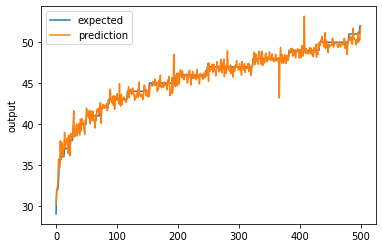

In [23]:
# Plot the chart
import matplotlib.pyplot as plt
chart_regression(pred.flatten(),y_test)